# News Mood
- Review of last 100 Tweets by top news outlets shows CBS tweets have considerably higher compound sentiment score than  BBC, Fox News, the New York Times and CNN. (Results obtained utilizing Vader Sentiment Analyzer).
- The average sentiment score for Fox News' last 100 tweets was close to neutral. Inspection of the individual tweet sentiment scores however shows that they vascilated between tweets that leaned more positively and more negatively, rather than each tweet itself rating neutrally. 
- Vader Sentiment Analyzer does not currently support emojis. Once supported, will BBC's high use of emojis in their tweets affect their sentiment score?

In [207]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
import json
import numpy as np
from datetime import timezone
from datetime import datetime
import pytz
import emoji

In [180]:
# list of news orgs to analyze
newsOutlets = ['@CNN','@BBC', '@CBS', '@Foxnews', '@nytimes', '@NPR']

### Don't forget to hide these!

In [3]:
# Twitter API Keys
#kristine keys
consumer_key = "HqmbSQzqMOeQI5U6zaIS42Pja"
consumer_secret = "EfDRnSYxvdBXE4Tj5rwAZyNC5gJXOxg7GL32Vf6QNqb1K45Xaw"
access_token = "35740765-Z8VkREBVuYzEnoKwfKU9NqbJp1FRJEEUZ1VKQ5yNY"
access_token_secret = "N3VeKhoiOgFfrW65uFJflIfAxhDT24MHR2NVkFH5vd0XR"

In [25]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [26]:
analyzer = SentimentIntensityAnalyzer()

In [130]:
# tweet date/times are reported in utc
local_tz = pytz.timezone('America/New_York')

In [181]:
# create lists of lists to hold all data
sentiments = [[] for i in range(1, len(newsOutlets)+1)]
positives = [[] for i in range(1, len(newsOutlets)+1)]
negatives = [[] for i in range(1, len(newsOutlets)+1)]
neutrals = [[] for i in range(1, len(newsOutlets)+1)]
texts = [[] for i in range(1, len(newsOutlets)+1)]
localtimes = [[] for i in range(1, len(newsOutlets)+1)]
utctimes = [[] for i in range(1, len(newsOutlets)+1)]

# create a df to hold all 
df = pd.DataFrame(columns=['newsOutlet','text','utctime','localtime','compound','positive','negative','neutral'])

indexCounter = 0

for newsindex, news in enumerate(newsOutlets):
    if 1 == 1: #used for testing subsets; 1==1 will use all news outlets
        print("********************************************************************************************")
#         print(news)
        # loop through 5 times to get 100 tweets
        for page in range(1,6):
            print("**********************************************" + news + " Page " + str(page) + "**********************************************")
            news_tweets = api.user_timeline(news, page= page)

            # Loop through all tweets
            for index, tweet in enumerate(news_tweets):

                # Print the JSON object to view output
                # print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))
                
                # print the tweet text
                print(str(index) + " " + tweet["text"])
                
                # add the text and time to lists
#                 texts[newsindex].append(tweet["text"])
                utcTime = tweet["created_at"]
#                 utctimes[newsindex].append(utcTime)
#                 utc_dt.replace(tzinfo=timezone.utc).astimezone(tz=None)
#                 localTime = utcTime.replace(tzinfo=timezone.utc)astimezone(tz=None))
#                 localTime = date(utcTime).strftime('%Y-%m-%d %H:%M:%S.%f %Z%z')
#                 times[newsindex].append(localTime)
                convertedTime = datetime.strptime(utcTime, '%a %b %d %H:%M:%S %z %Y')
                localTime = convertedTime.replace(tzinfo=timezone.utc).astimezone(local_tz)
                
                # analyze the tweet text
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]
                
                
                # add the compound to the news sentiment list for plotting
                sentiments[newsindex].append(compound)
                
                # add all of the sentiments to their own lists
#                 positives[newsindex].append(pos)
#                 negatives[newsindex].append(neg)
#                 neutrals[newsindex].append(neu)
                
                # add all the data to the df
                df.loc[indexCounter] = [news,tweet["text"], utcTime, str(localTime), compound, pos, neg, neu]
                
                indexCounter += 1


********************************************************************************************
**********************************************@CNN Page 1**********************************************
0 One of cycling's biggest races will begin outside of Europe for the first time https://t.co/C3PpERlABk https://t.co/epkKiAfpJW
1 Georgia Tech student fatally shot in the heart by campus police officer who ”overreacted,” lawyer says… https://t.co/CnLVBFSiIS
2 Meghan McCain is in late-stage talks to join ABC's "The View," sources say https://t.co/mvQVTiGEaF
3 Shares of Boeing are up more than 60% so far in 2017 https://t.co/xakDVaKa6d
4 Sean Spicer's Emmy cameo wasn't funny at all, writes @CillizzaCNN https://t.co/4bxiMSNALo https://t.co/4LkJXHRrFT
5 A federal judge hearing arguments about the termination of DACA is reading President Trump's tweets carefully… https://t.co/pnoUulquDl
6 Snapchat has pulled Al Jazeera's channel from its app in Saudi Arabia https://t.co/5HMta0V0p2 https://t.co/a1

0 In Bangladesh's overcrowded Rohingya refugee camps, supplies are limited and circumstances are dire… https://t.co/sY915c8NOb
1 Here's a side of North Korea the world rarely sees https://t.co/vg7x7X0acp https://t.co/uZOrf9Jjys
2 With the golf retweet, Trump blunders into the 'Streisand effect,' writes Kara Alaimo for @CNNopinion… https://t.co/wbfHs3LabN
3 Want a job as a NASA astronaut? Read this https://t.co/Vm3ZGxZ2h1 https://t.co/zMOsnppIfs
4 RT @CNNent: .@HandmaidsOnHulu wins Outstanding Drama Series. #Emmys
https://t.co/kW0bACaYEQ https://t.co/u7RaAqkiQK
5 Republican leaders are serious about one last attempt to overhaul Obamacare https://t.co/SvMsLvLsR7 https://t.co/5uVihhWtwd
6 RT @CNNent: Elisabeth Moss wins Outstanding Lead Actress in a Drama Series for @HandmaidsOnHulu #Emmys
https://t.co/JpDysgJ8Uu https://t.co…
7 RT @CNNent: .@SterlingKBrown wins Outstanding Lead Actor in a Drama Series for @NBCThisisUs #Emmys
https://t.co/jwFxSD2AcQ https://t.co/LtW…
8 Four American colle

0 🍲⏰ Super speedy suppers that won't disappoint on the flavour front. 👉 https://t.co/VCM39TWthv https://t.co/iGibqbYePL
1 In the Yukon’s remote mountains is evidence of the Earth’s tumultuous climate swings from millions of years ago. 🏔… https://t.co/KJWFZrjiEx
2 'The happiest years I've ever spent were those working in the Women's Land Army.' 💪👭 Via @BBC5Live. https://t.co/6YJLgCdczy
3 Why are we willing to pay for bottled water when we can get it out of the tap for free? 🚰 https://t.co/kgqFsC9BJO https://t.co/hXnSTDC60K
4 💍 Tying the knot changes our personalities for better &amp; for worse... https://t.co/Zd91A4jxhC https://t.co/kKSc19PNSZ
5 The woman highlighting New Zealand's devastating suicide problem with hundreds of pairs of shoes. ❤️️👟 Via… https://t.co/RKCwFQO3gM
6 🌳🥇 An oak with royal connections &amp; a mulberry at the centre of a legend are up for the title of Tree of the Year.… https://t.co/HTMtgU0j0G
7 Jim Carrey calls NY Fashion Week 'meaningless' in bizarre interview.

0 See the biggest names in television light up the #Emmys red carpet: https://t.co/5yaM4UF4KX #ICYMI https://t.co/4qh6onq8OF
1 Host Stephen Colbert blew the audience away with his opening number at the #Emmys. Watch the full clip:… https://t.co/Rv3NwjJuKZ
2 Did you miss television's biggest night? Catch up on the #Emmys now: https://t.co/EMxWKauzMb https://t.co/2Y71gw7Jr7
3 Catch up on all the entertaining speeches and big wins from the most glamorous night on TV. Watch the #Emmys now:… https://t.co/FRoKq9OFTs
4 Who took home a golden statuette? See the complete list of winners from the #Emmys: https://t.co/W9VduVc9lp https://t.co/d5FqBXDhtn
5 A complete showcase of Stephen Colbert's funniest moments from the #Emmys: https://t.co/L1vnRQw4Ri https://t.co/f9RHVgC2Kc
6 RT @colbertlateshow: Stephen starts to glitch while hosting the #Emmys &amp; needs to be evaluated... in the nude. Watch the full diagnosis: ht…
7 That’s a wrap! Congratulations to all #Emmy winners! https://t.co/Pi8ASpHYK5

0 RT @GOPatterson: YES @HillaryScottLA AND @KarenFairchild HONORING @reba 🙌🏽❤️🙌🏽 #ACMHonors This is Heaven !!
1 .@HillaryScottLA, @KarenFairchild and @ohgussie are serenading @Reba with her own hits! 🎶
#ACMHonors https://t.co/5OA0lspNn0
2 RT @RussellMadison_: Time for #ACMHonors !
3 Don’t miss out on an evening with country music’s biggest stars, the 11th Annual ACM Honors begins soon! #ACMHonors https://t.co/LECt13Hloa
4 Tonight, get ready for a country celebration! Watch the #ACMHonors @ 9/8c on CBS, or stream it with CBS All Access:… https://t.co/U76gWo1mEG
5 RT @CBSBigBrother: Paul, Christmas, &amp; Josh begin the battle to win the $500,000 grand prize tonight at 8/7c on #BB19: https://t.co/uudtMeMR…
6 RT @TheTalkCBS: Even our ladies know that as hosts, sometimes you have to bare it all - just ask #Emmys host @StephenAtHome https://t.co/3Y…
7 RT @SEALTeamCBS: See how #SEALTeam's heroic German Shepherd—DITA the Hair Missile—spends her days on set! 🐕📷: https://t.co/hoqjTFrtbC https…


0 Tillerson Considers Closing Embassy in Havana Where Diplomats Mysteriously Got Sick https://t.co/NsKbM1EmkO
1 .@TomiLahren on universal basic income: "If an iPad can replace you, be careful how you feel about minimum wage."… https://t.co/4SVHXLUZuo
2 Ruben Navarrette on universal basic income: "If they had that incentive they wouldn't need the handout in the first… https://t.co/yrKbBkcumx
3 Ruben Navarrette on universal basic income: "There's a tension that exists around the idea of incentive."… https://t.co/OWD5M3H3NC
4 Ruben Navarrette on universal basic income: "We should just call it by its proper name, this is free money. This is… https://t.co/y4vzkkcZkx
5 Former press secretary @seanspicer makes cameo appearance at the #Emmys https://t.co/U17MSWWl4r https://t.co/EZB2DQlHV2
6 .@LucyFlores on universal basic income: "They idea isn't that we're taking care of everybody." @NextRevFNC https://t.co/8AkjO6TpBS
7 .@TomiLahren on @POTUS working with Dems: "He's having to go to the Democ

0 RT @nytimesworld: Pakistan's former prime minister was thrown out seven weeks ago. His wife won his assembly seat on Sunday. https://t.co/d…
1 President Trump, Emmy punching bag https://t.co/0ZhyqQ8QgN
2 A location scout for the Netflix series "Narcos" was found shot dead in Mexico https://t.co/yCP6MkTXYK
3 Some Emmy viewers were not interested in laughing along with Sean Spicer https://t.co/WWrshUHeWy
4 Four American college students were attacked with acid by a woman at a train station in Marseille https://t.co/bsRYsGSyfc
5 After 50 years, Rolling Stone is bowing to the pressures of a troubled industry https://t.co/tCPQqD99Uu
6 Opinion: What punk rock meant to Communist Yugoslavia https://t.co/ZfwthHMoYg
7 Maria is now officially a hurricane, and the feeling in the Caribbean can be summed up with one word: Again? https://t.co/LtqBlSa4Um
8 RT @peterbakernyt: Inside the tension in the White House legal team over how to respond to Mueller requests for documents. @kenvogel https:…
9 No

0 RT @nprmusic: Wenner Media, the company founded by Jann Wenner, is selling its controlling stake in Rolling Stone. https://t.co/Z0Lr5uoFRm…
1 RT @MorningEdition: .@RepGutierrez on Democrats passing a DREAM bill: "We have the leverage." https://t.co/tRf1rfWl5R https://t.co/xBosKOHJ…
2 Top Stories: Hurricane Maria Advances; Trump's Handling Of North Korea https://t.co/UHqZ4xqP31
3 'Rolling Stone' Magazine Is Put Up For Sale https://t.co/D1kiC9CKSk
4 Multiple polls show Republicans opposed to DACA, but there is more division on what should happen to DREAMers https://t.co/5WwctaNpDJ
5 Hurricane Maria Heads Toward Puerto Rico; Expected To Become Major Storm https://t.co/Qajyf2QkWq
6 It's estimated nearly a third of all Texas college students, or half a million, were affected in some way by Harvey https://t.co/N3iz6VG1Fj
7 RT @UpFirst: In a tweet, Trump once likened the U.N. to a "club." Now, the president will attend his first General Assembly. https://t.co/x…
8 RT @MorningEdition: Women 

In [205]:
df[df["newsOutlet"]=="@BBC"]

,newsOutlet,text,utctime,localtime,compound,positive,negative,neutral
100,@BBC,"Angry swan, 'arrested' by police following 'ro...",Mon Sep 18 16:37:47 +0000 2017,2017-09-18 12:37:47-04:00,-0.7845,0.000,0.434,0.566
101,@BBC,Andy Murray: 'Tennis women make the same sacri...,Mon Sep 18 16:37:03 +0000 2017,2017-09-18 12:37:03-04:00,0.0000,0.000,0.000,1.000
102,@BBC,🦍 Cincinnati Zoo has introduced its first new ...,Mon Sep 18 16:17:03 +0000 2017,2017-09-18 12:17:03-04:00,-0.5994,0.000,0.196,0.804
103,@BBC,RT @bbcwritersroom: Screenwriter Stephen Butch...,Mon Sep 18 16:16:28 +0000 2017,2017-09-18 12:16:28-04:00,0.0000,0.000,0.000,1.000
104,@BBC,RT @BBCSpringwatch: Why have so many Portugues...,Mon Sep 18 16:07:14 +0000 2017,2017-09-18 12:07:14-04:00,0.0000,0.000,0.000,1.000
105,@BBC,When you've worked in customer service WAY too...,Mon Sep 18 16:01:05 +0000 2017,2017-09-18 12:01:05-04:00,0.0000,0.000,0.000,1.000
106,@BBC,Cast an eye over the best-dressed stars at thi...,Mon Sep 18 15:54:08 +0000 2017,2017-09-18 11:54:08-04:00,0.0000,0.000,0.000,1.000
107,@BBC,"RT @BBCR1: ""The fans are so cool."" \n\n@MileyC...",Mon Sep 18 14:01:54 +0000 2017,2017-09-18 10:01:54-04:00,0.6369,0.160,0.000,0.840
108,@BBC,"RT @bbccomedy: New #W1A tonight, 10pm @BBCTwo!...",Mon Sep 18 13:44:00 +0000 2017,2017-09-18 09:44:00-04:00,0.0000,0.000,0.000,1.000
109,@BBC,RT @bbcmusic: 🎉 Celebrate 25 years of @BBCLate...,Mon Sep 18 13:43:52 +0000 2017,2017-09-18 09:43:52-04:00,0.5719,0.144,0.000,0.856


In [182]:
# save df to csv
df.to_csv("newsOutletTweets.csv")

In [53]:
for index2, s in enumerate(sentiments):
    print(newsOutlets[index2])
    print(s)

@CNN
[0.0, 0.3612, 0.0, 0.4215, 0.0, 0.34, 0.0, 0.0, -0.0516, -0.2263, -0.1027, 0.0, -0.4767, 0.0, 0.0, 0.4404, -0.9062, 0.0, 0.0, -0.0516]
@BBC
[0.0, -0.3182, 0.3182, 0.0, 0.3612, -0.4019, 0.5574, 0.0, 0.0, 0.5719, 0.0, 0.0, 0.0, 0.3612, 0.0, 0.0, 0.6369, 0.1531, 0.0258, 0.0]
@CBS
[0.7974, 0.0, 0.8588, 0.8087, 0.8126, 0.7269, 0.0, 0.6166, 0.6421, 0.4389, 0.7845, 0.9396, 0.6688, 0.6476, 0.0, 0.5719, 0.6696, 0.3182, 0.4215, 0.7239]
@Foxnews
[0.0, 0.0, -0.4588, 0.0772, -0.5116, 0.2716, 0.0, 0.5106, 0.4939, 0.0, 0.4019, 0.4939, 0.5719, 0.0, -0.5423, -0.8519, -0.9231, -0.0258, -0.3832, -0.0222]
@nytimes
[-0.4588, 0.0, 0.2023, -0.3182, -0.6597, -0.3818, -0.5423, 0.0, 0.0, 0.4215, -0.4939, -0.4588, 0.0, 0.0, 0.0, 0.0, 0.4927, 0.4215, 0.0, 0.4215]


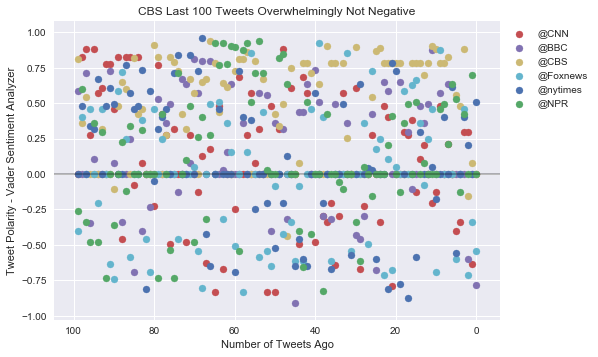

In [183]:
# plot the compound sentiment

tweetsAgo = np.arange(len(sentiments[0]))
tweetsAgo
# plot each news outlets sentiments from last 100 tweets
for index3, s in enumerate(sentiments):
    plt.scatter(tweetsAgo, sentiments[index3], label=newsOutlets[index3])

# invert the x_axis so it shows furthest in time first
plt.gca().invert_xaxis()

# move the legend outside the frame of the plot
plt.legend(bbox_to_anchor=(1, 1))

# plot a hortizontal line at neutral (0)
plt.axhline(0, c='k', alpha = .3)

plt.ylabel("Tweet Polarity - Vader Sentiment Analyzer")
plt.xlabel("Number of Tweets Ago")
plt.title("CBS Last 100 Tweets Overwhelmingly Not Negative")

plt.show()

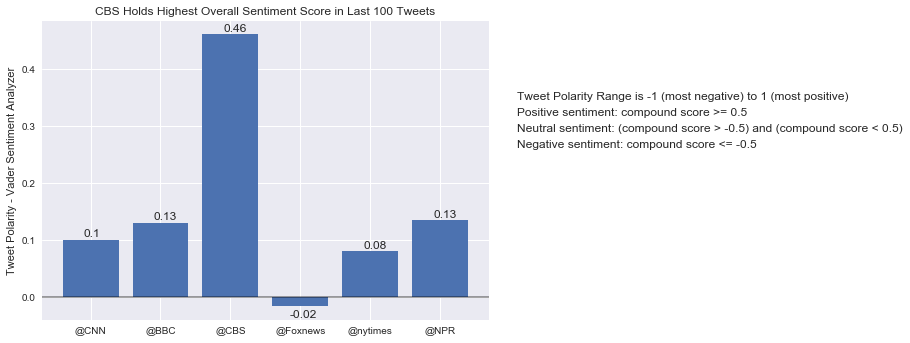

In [229]:
# create an empty list to hold the average sentiments 
avgSentiment = []

x_axis = np.arange(len(newsOutlets))

for index2, s in enumerate(sentiments):
    avgSentiment.append(np.mean(s))

plt.bar(x_axis,avgSentiment)

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(x_axis, newsOutlets)
plt.axhline(0, c="k", alpha=0.4)

# plt.ylim(-1,1)

# add the values to the bar chart
for a,b in zip(x_axis, avgSentiment):
    if b<0:
        plt.text(a-.15, b-.02, round(b,2))
    else:
        plt.text(a-.1, b+.005, round(b,2))

plt.title("CBS Holds Highest Overall Sentiment Score in Last 100 Tweets")
plt.ylabel("Tweet Polarity - Vader Sentiment Analyzer")
plt.gcf().text(.95, 0.68, "Tweet Polarity Range is -1 (most negative) to 1 (most positive)", fontsize=12, )
plt.gcf().text(.95, 0.64, "Positive sentiment: compound score >= 0.5", fontsize=12, )
plt.gcf().text(.95, 0.60, "Neutral sentiment: (compound score > -0.5) and (compound score < 0.5)", fontsize=12, )
plt.gcf().text(.95, 0.56, "Negative sentiment: compound score <= -0.5", fontsize=12, )
plt.show()

In [195]:
# count at 0
df[(df["compound"]==0)].groupby("newsOutlet").count()

,text,utctime,localtime,compound,positive,negative,neutral
newsOutlet,,,,,,,
@BBC,40,40,40,40,40,40,40
@CBS,27,27,27,27,27,27,27
@CNN,24,24,24,24,24,24,24
@Foxnews,32,32,32,32,32,32,32
@NPR,31,31,31,31,31,31,31
@nytimes,37,37,37,37,37,37,37


In [197]:
# lowest 
df.groupby("newsOutlet")["compound"].min()

newsOutlet
@BBC       -0.9100
@CBS       -0.4389
@CNN       -0.8360
@Foxnews   -0.8360
@NPR       -0.8279
@nytimes   -0.8720
Name: compound, dtype: float64

In [199]:
# highest
df.groupby("newsOutlet")["compound"].max()

newsOutlet
@BBC        0.8720
@CBS        0.9396
@CNN        0.8834
@Foxnews    0.9224
@NPR        0.9381
@nytimes    0.9601
Name: compound, dtype: float64

In [211]:
# count number of emojis
emojiDict = {}
for index, row in df.iterrows():
    for c in row["text"]:
        if c in emoji.UNICODE_EMOJI:
            if row["newsOutlet"] in emojiDict:
                emojiDict[row["newsOutlet"]] += 1
            else:
                emojiDict[row["newsOutlet"]] = 1
print(emojiDict)

{'@BBC': 145, '@CBS': 18, '@NPR': 4}


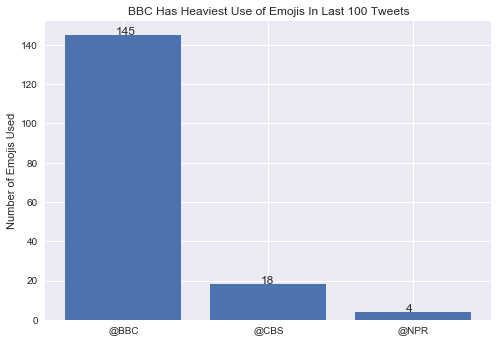

In [225]:
# plot emojis
x_axis = np.arange(len(emojiDict))
x_axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, emojiDict.keys())
plt.bar(x_axis,emojiDict.values())
plt.title("BBC Has Heaviest Use of Emojis In Last 100 Tweets")
plt.ylabel("Number of Emojis Used")

for a,b in zip(x_axis, emojiDict.values()):
    plt.text(a-.05, b+.2, b)

plt.show()